In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.optimize as opt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

C:\Users\VisualBI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('train_loanDataset.csv', sep=',')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()    ## getting summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
## LoanAmount has (614 – 592) 22 missing values.
## Loan_Amount_Term has (614 – 600) 14 missing values.
## Credit_History has (614 – 564) 50 missing values
## The ApplicantIncome distribution seems to be close to mean. Same with CoapplicantIncome

In [6]:
## For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to 
## understand whether they make sense or not.
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

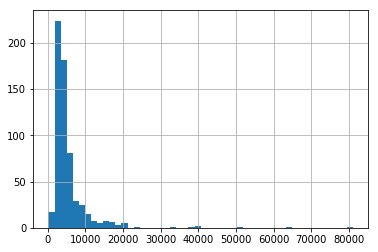

In [8]:
## Plotting histogram and box plots to study the distributions of numerical variables in detail
df['ApplicantIncome'].hist(bins=50)

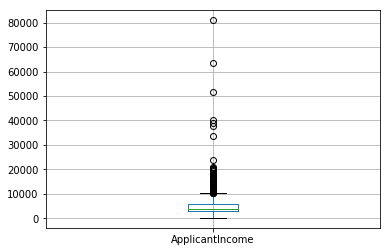

In [9]:
df.boxplot(column='ApplicantIncome')

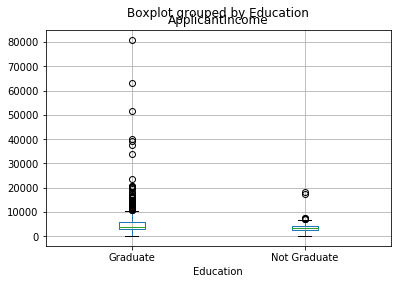

In [10]:
## Few extreme values which are the outliers
df.boxplot(column='ApplicantIncome', by = 'Education')

In [11]:
## Higher number of graduates that are outliers

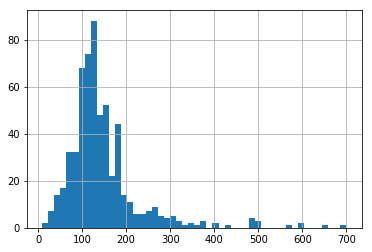

In [12]:
df['LoanAmount'].hist(bins=50)

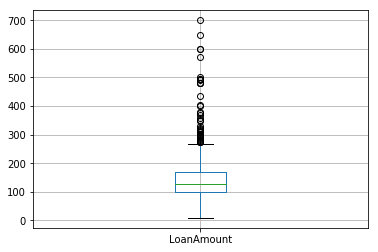

In [13]:
df.boxplot(column='LoanAmount')

In [14]:
## There are some extreme values
## LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values.

## Data Transformations: 

## 1. Imputing missing values in the variables
## Reidentifying the missing values:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
## imputing 'LoanAmount' with it's mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [16]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
## Since more than 80% values are “No”, it is safe to impute the missing values as “No”
df['Self_Employed'].fillna('No',inplace=True)

## imputing others
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [18]:
## Data Transformation 2: 
## let’s try a log transformation to nullify the skewed histograms of LoanAmount and ApplicantIncome

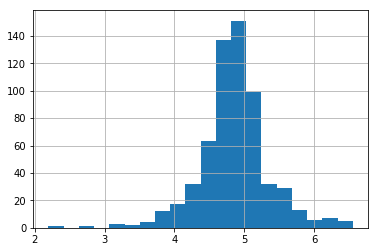

In [19]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [20]:
## distribution looks much closer to normal
## some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both 
## incomes as total income and take a log transformation of the same.


df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [21]:
## CONVERTING all categorical variables to numerical before starting with predictions
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [23]:
## Splitting data into X and Y


X = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']]

Y = df[['Loan_Status']]

## Grouping data into Train, Validation and Test

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)




In [32]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
# from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
300/300 [==============================] - 0s 981us/step - loss: 0.6754 - acc: 0.6667
Epoch 2/20
300/300 [==============================] - 0s 93us/step - loss: 0.6455 - acc: 0.6667
Epoch 3/20
300/300 [==============================] - 0s 120us/step - loss: 0.6407 - acc: 0.6667
Epoch 4/20
300/300 [==============================] - 0s 136us/step - loss: 0.6406 - acc: 0.6667
Epoch 5/20
300/300 [==============================] - 0s 153us/step - loss: 0.6423 - acc: 0.6667
Epoch 6/20
300/300 [==============================] - 0s 146us/step - loss: 0.6415 - acc: 0.6667
Epoch 7/20
300/300 [==============================] - 0s 126us/step - loss: 0.6407 - acc: 0.6667
Epoch 8/20
300/300 [==============================] - 0s 110us/step - loss: 0.6415 - acc: 0.6667
Epoch 9/20
300/300 [==============================] - 0s 106us/step - loss: 0.6405 - acc: 0.6667
Epoch 10/20
300/300 [==============================] - 0s 100us/step - loss: 0.6409 - acc: 0.6667
Epoch 11/20
300/300 [=========

In [34]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [35]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 66.67%
Test accuracy = 72.43%


In [31]:
## Experiment 1
## Number of hidden layers in NN

In [36]:
accuracy_validation = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu', input_dim = 10))
    i=0
    # N Number of Hidden Layers
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/4
300/300 [==============================] - 0s 914us/step - loss: 0.7253 - acc: 0.3400
Epoch 2/4
300/300 [==============================] - 0s 103us/step - loss: 0.6889 - acc: 0.6267
Epoch 3/4
300/300 [==============================] - 0s 96us/step - loss: 0.6841 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 93us/step - loss: 0.6811 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/4
300/300 [==============================] - 0s 2ms/step - loss: 0.6829 - acc: 0.6667
Epoch 2/4
300/300 [==============================] - 0s 103us/step - loss: 0.6591 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 123us/step - loss: 0.6429 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 106us/step - loss: 0.6416 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: T

Epoch 1/4
300/300 [==============================] - 1s 2ms/step - loss: 0.6913 - acc: 0.6467
Epoch 2/4
300/300 [==============================] - 0s 120us/step - loss: 0.6876 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 133us/step - loss: 0.6842 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 130us/step - loss: 0.6810 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
300/300 [==============================] - 1s 2ms/step - loss: 0.6913 - acc: 0.6533
Epoch 2/4
300/300 [==============================] - 0s 139us/step - loss: 0.6867 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 143us/step - loss: 0.6756 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 123us/step - loss: 0.6569 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
300/300 [==============================] - 1s 2ms/step - loss: 0.6915 - acc: 0.6467
Epoch 2/4
300/300 [==============================] - 0s 153us/step - loss: 0.6878 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 150us/step - loss: 0.6847 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 133us/step - loss: 0.6816 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
300/300 [==============================] - 1s 2ms/step - loss: 0.6911 - acc: 0.6533
Epoch 2/4
300/300 [==============================] - 0s 133us/step - loss: 0.6868 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 113us/step - loss: 0.6808 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 123us/step - loss: 0.6711 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
300/300 [==============================] - 1s 2ms/step - loss: 0.6913 - acc: 0.6533
Epoch 2/4
300/300 [==============================] - 0s 140us/step - loss: 0.6879 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 143us/step - loss: 0.6846 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 136us/step - loss: 0.6816 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
300/300 [==============================] - 1s 3ms/step - loss: 0.6911 - acc: 0.6533
Epoch 2/4
300/300 [==============================] - 0s 136us/step - loss: 0.6869 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 146us/step - loss: 0.6827 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 130us/step - loss: 0.6782 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
300/300 [==============================] - 1s 3ms/step - loss: 0.6910 - acc: 0.6600
Epoch 2/4
300/300 [==============================] - 0s 143us/step - loss: 0.6869 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 140us/step - loss: 0.6830 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 130us/step - loss: 0.6786 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-p

Epoch 1/4
300/300 [==============================] - 1s 4ms/step - loss: 0.6911 - acc: 0.6467
Epoch 2/4
300/300 [==============================] - 0s 146us/step - loss: 0.6864 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 143us/step - loss: 0.6814 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 136us/step - loss: 0.6747 - acc: 0.6667


Text(0,0.5,'Accuracy on Validation Set')

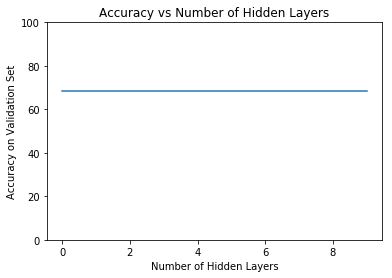

In [37]:
plt.ylim([0,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

In [39]:
## Number of Hidden layers doesn't have any impact on accuracy
## Hence, we will keep only 1 hidden layer in the NN

In [40]:
## Algorithm 1: Neural Networks
## Experiment 2
## No of Nodes in Hidden Layer

In [43]:
accuracy_validation = [None]*10
count = 0
for NoOfNodes in range(5,10):
    
    classifier = Sequential()
    # First Layer + Hidden Layer
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = 10))
    
    # Second Hidden Layer
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu'))

    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=5, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/4
300/300 [==============================] - 1s 4ms/step - loss: 0.6918 - acc: 0.6033
Epoch 2/4
300/300 [==============================] - 0s 173us/step - loss: 0.6877 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 163us/step - loss: 0.6842 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 193us/step - loss: 0.6811 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/4
300/300 [==============================] - 1s 4ms/step - loss: 0.6919 - acc: 0.5967
Epoch 2/4
300/300 [==============================] - 0s 163us/step - loss: 0.6879 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 186us/step - loss: 0.6845 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 193us/step - loss: 0.6813 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=7, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/4
300/300 [==============================] - 1s 4ms/step - loss: 0.6830 - acc: 0.6667
Epoch 2/4
300/300 [==============================] - 0s 193us/step - loss: 0.6584 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 156us/step - loss: 0.6418 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 153us/step - loss: 0.6409 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=8, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/4
300/300 [==============================] - 1s 4ms/step - loss: 0.6649 - acc: 0.6667
Epoch 2/4
300/300 [==============================] - 0s 189us/step - loss: 0.6432 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 180us/step - loss: 0.6408 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 206us/step - loss: 0.6416 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=9, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Epoch 1/4
300/300 [==============================] - 1s 4ms/step - loss: 0.6795 - acc: 0.6167
Epoch 2/4
300/300 [==============================] - 0s 189us/step - loss: 0.6492 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 150us/step - loss: 0.6411 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 140us/step - loss: 0.6406 - acc: 0.6667


Text(0,0.5,'Accuracy on Validation Set')

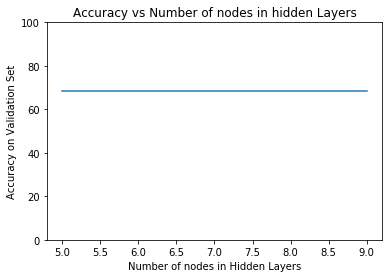

In [48]:
plt.ylim([0,100])
plt.plot(range(5,15),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

In [49]:
## From the above plot , No. of layers according to our data set doesn't really change the accuracy of the validation set,
## We finalize 6 number of Nodes
## Best guess is average of output layer and no of features, that is 11+1 / 2 ~ 6

In [50]:
## Experiment 3
## Changing activation functions (sigmoid, tanh, etc.)

In [51]:
accuracy_validation = [None]*3
count = 0
activationFunc = ['relu','sigmoid','tanh']
for activation_Func in range(len(activationFunc)):
    
    classifier = Sequential()

    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10))
    
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = activationFunc[activation_Func]))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/4
300/300 [==============================] - 4s 13ms/step - loss: 10.7454 - acc: 0.3333
Epoch 2/4
300/300 [==============================] - 0s 180us/step - loss: 10.7454 - acc: 0.3333
Epoch 3/4
300/300 [==============================] - 0s 156us/step - loss: 10.7454 - acc: 0.3333
Epoch 4/4
300/300 [==============================] - 0s 166us/step - loss: 10.7454 - acc: 0.3333


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/4
300/300 [==============================] - 1s 5ms/step - loss: 0.6915 - acc: 0.6333
Epoch 2/4
300/300 [==============================] - 0s 206us/step - loss: 0.6878 - acc: 0.6667
Epoch 3/4
300/300 [==============================] - 0s 196us/step - loss: 0.6843 - acc: 0.6667
Epoch 4/4
300/300 [==============================] - 0s 206us/step - loss: 0.6812 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/4
300/300 [==============================] - 2s 5ms/step - loss: 1.4801 - acc: 0.3333
Epoch 2/4
300/300 [==============================] - 0s 203us/step - loss: 0.7019 - acc: 0.5433
Epoch 3/4
300/300 [==============================] - 0s 199us/step - loss: 0.6660 - acc: 0.6267
Epoch 4/4
300/300 [==============================] - 0s 236us/step - loss: 0.6629 - acc: 0.6233


Text(0,0.5,'Accuracy on Validation Set')

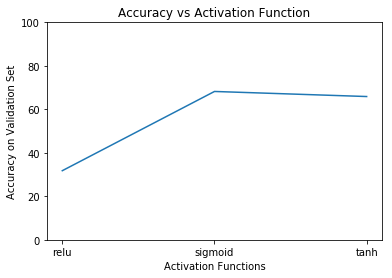

In [52]:
plt.ylim([0,100])
plt.plot(activationFunc,accuracy_validation)
plt.title("Accuracy vs Activation Function")
plt.xlabel("Activation Functions")
plt.ylabel("Accuracy on Validation Set")

In [68]:
## As we can see from the above plot, 'sigmoid' function has the highest accuracy score
## Hence, we use 'sigmoid' activation for the Output Layer

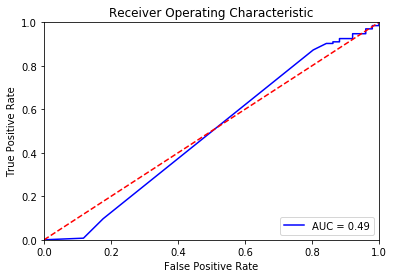

ROC_AUC Score : 0.490049751243781


In [69]:
## ROC Error metrics:
predictions = classifier.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )

In [ ]:
## Experiment 4
## Batch size for error back propagation

In [61]:
accuracy_validation = [None]*10
count = 0
for batchSize in range(5,15):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10))
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, nb_epoch = 3)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
300/300 [==============================] - 3s 8ms/step - loss: 0.6892 - acc: 0.6200
Epoch 2/3
300/300 [==============================] - 0s 747us/step - loss: 0.6579 - acc: 0.6667
Epoch 3/3
300/300 [==============================] - 0s 579us/step - loss: 0.6435 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
300/300 [==============================] - 2s 8ms/step - loss: 0.6823 - acc: 0.6667
Epoch 2/3
300/300 [==============================] - 0s 649us/step - loss: 0.6468 - acc: 0.6667
Epoch 3/3
300/300 [==============================] - 0s 624us/step - loss: 0.6422 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
300/300 [==============================] - 3s 9ms/step - loss: 0.6665 - acc: 0.6667
Epoch 2/3
300/300 [==============================] - 0s 341us/step - loss: 0.6433 - acc: 0.6667
Epoch 3/3
300/300 [==============================] - 0s 329us/step - loss: 0.6415 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
300/300 [==============================] - 3s 9ms/step - loss: 0.6828 - acc: 0.6667
Epoch 2/3
300/300 [==============================] - 0s 343us/step - loss: 0.6555 - acc: 0.6667
Epoch 3/3
300/300 [==============================] - 0s 420us/step - loss: 0.6424 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
300/300 [==============================] - 3s 8ms/step - loss: 0.6791 - acc: 0.6667
Epoch 2/3
300/300 [==============================] - 0s 423us/step - loss: 0.6465 - acc: 0.6667
Epoch 3/3
300/300 [==============================] - 0s 455us/step - loss: 0.6400 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
300/300 [==============================] - 3s 9ms/step - loss: 0.6915 - acc: 0.6067
Epoch 2/3
300/300 [==============================] - 0s 341us/step - loss: 0.6844 - acc: 0.6667
Epoch 3/3
300/300 [==============================] - 0s 301us/step - loss: 0.6631 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
300/300 [==============================] - 3s 9ms/step - loss: 0.6857 - acc: 0.6000
Epoch 2/3
300/300 [==============================] - 0s 286us/step - loss: 0.6563 - acc: 0.6667
Epoch 3/3
300/300 [==============================] - 0s 263us/step - loss: 0.6414 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
300/300 [==============================] - 3s 9ms/step - loss: 0.6775 - acc: 0.6667
Epoch 2/3
300/300 [==============================] - 0s 295us/step - loss: 0.6511 - acc: 0.6667
Epoch 3/3
300/300 [==============================] - 0s 272us/step - loss: 0.6407 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
300/300 [==============================] - 3s 10ms/step - loss: 0.6829 - acc: 0.6667
Epoch 2/3
300/300 [==============================] - 0s 284us/step - loss: 0.6603 - acc: 0.6667
Epoch 3/3
300/300 [==============================] - 0s 287us/step - loss: 0.6474 - acc: 0.6667


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/3
300/300 [==============================] - 3s 10ms/step - loss: 0.6883 - acc: 0.6667
Epoch 2/3
300/300 [==============================] - 0s 207us/step - loss: 0.6711 - acc: 0.6667
Epoch 3/3
300/300 [==============================] - 0s 220us/step - loss: 0.6490 - acc: 0.6667


Text(0,0.5,'Accuracy on Validation Set')

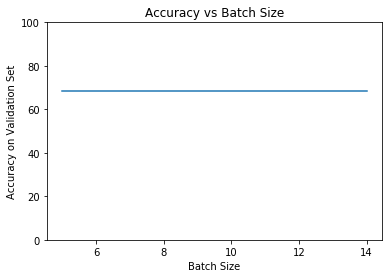

In [62]:
plt.ylim([0,100])
plt.plot(range(5,15),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

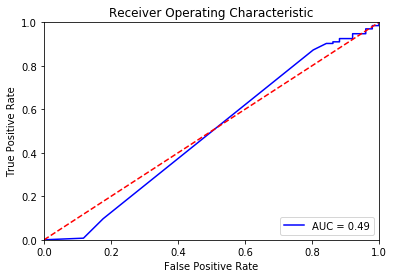

ROC_AUC Score : 0.490049751243781


In [67]:
## ROC Error metrics:
predictions = classifier.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )


In [63]:
# I'll select Batch Size = 10, as there are no changes in accuracy

In [64]:
## Final NN after doing Hyper parameter tuning

In [65]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=6, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
300/300 [==============================] - 3s 11ms/step - loss: 0.6910 - acc: 0.6667
Epoch 2/20
300/300 [==============================] - 0s 422us/step - loss: 0.6859 - acc: 0.6667
Epoch 3/20
300/300 [==============================] - 0s 389us/step - loss: 0.6790 - acc: 0.6667
Epoch 4/20
300/300 [==============================] - 0s 315us/step - loss: 0.6705 - acc: 0.6667
Epoch 5/20
300/300 [==============================] - 0s 334us/step - loss: 0.6611 - acc: 0.6667
Epoch 6/20
300/300 [==============================] - 0s 356us/step - loss: 0.6519 - acc: 0.6667
Epoch 7/20
300/300 [==============================] - 0s 422us/step - loss: 0.6452 - acc: 0.6667
Epoch 8/20
300/300 [==============================] - 0s 368us/step - loss: 0.6412 - acc: 0.6667 0s - loss: 0.6400 - acc: 0.669
Epoch 9/20
300/300 [==============================] - 0s 344us/step - loss: 0.6383 - acc: 0.6667
Epoch 10/20
300/300 [==============================] - 0s 339us/step - loss: 0.6375 - acc: 0.6667

Train accuracy = 66.67%
Test accuracy = 72.43%
Validation accuracy = 68.22%


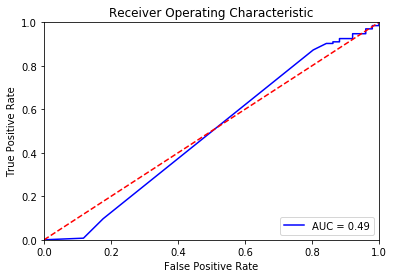

ROC_AUC Score : 0.490049751243781


In [66]:
## Metrics of our final model after experimentation

print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))
print('Validation accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)))

## ROC Error metrics:
predictions = classifier.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )



In [70]:
### KNN classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

# What k works best? Let's try several ...
for k in range(1,22):
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(X_train,y_train)
        print(k, KNN.score(X_test,y_test))

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConve

1 0.7297297297297297
2 0.6324324324324324
3 0.745945945945946
4 0.6972972972972973
5 0.7621621621621621
6 0.7513513513513513
7 0.7837837837837838
8 0.7891891891891892
9 0.7783783783783784
10 0.7675675675675676
11 0.7675675675675676
12 0.7675675675675676
13 0.7513513513513513
14 0.7621621621621621
15 0.7513513513513513
16 0.7513513513513513
17 0.7675675675675676
18 0.7567567567567568
19 0.7243243243243244
20 0.7189189189189189
21 0.7243243243243244


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConve

In [91]:
## We find the k value of 8 (number of neighbors) provides the best accuracy score
## We consider 3 types of Distance metric to verify which is the best one


from sklearn.neighbors import KNeighborsClassifier
metric = ["euclidean","manhattan","hamming"]
accuracy = [None]*3
count=0
for p in range(0,3):
    KNN = KNeighborsClassifier(n_neighbors = 8, metric = metric[p])
    KNN.fit(X_train, y_train)
    accuracy[count] = KNN.score(X_test,y_test)
    count+=1

C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


[0.7891891891891892, 0.7837837837837838, 0.8054054054054054]


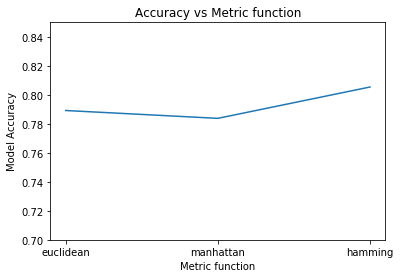

In [96]:
plt.ylim([0.70,0.85])
plt.plot(metric,accuracy)
plt.title("Accuracy vs Metric function")
plt.xlabel("Metric function")
plt.ylabel("Model Accuracy")
print(accuracy)

Training Score:0.8066666666666666
Test Accuracy Score:0.8054054054054054
Confusion Matrix:
[[ 23  28]
 [  8 126]]


C:\Users\VisualBI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


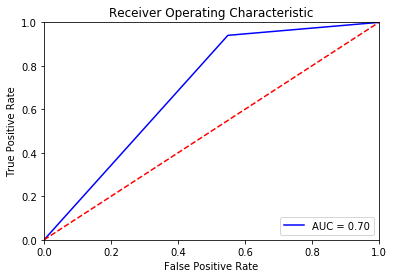

ROC_AUC Score : 0.6956394498097747


In [97]:
## "hamming" distance metric performs the best out of all 3

KNN = KNeighborsClassifier(n_neighbors = 8, metric = metric[2])
KNN.fit(X_train, y_train)
print("Training Score:"+ str(KNN.score(X_train,y_train)))
print("Test Accuracy Score:"+ str(KNN.score(X_test,y_test)))
predictions_knn = KNN.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix:")          
print(confusion_matrix(y_test,predictions_knn))

## ROC Error metrics:

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_knn)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC_AUC Score : " + str(roc_auc) )

In [98]:
### Accuracy score of KNN (0.8054) is much better than the score of Artificial Neural Networks (0.7243) 
## Although the ROC curve shows the error higher than KNN
## The low accuracy in ANN is due to small size of dataset. ANN requires huge dataset for large computations.